# Exploratory Data Analysis (EDA) on Car Tyre Dataset  

## Project Overview  
This project aims to explore and analyze the car tyre dataset to uncover meaningful insights about tyre brands, models, pricing, ratings, and demand patterns. Through this EDA, we’ll clean the data, handle missing values, and answer key business questions that will help understand market trends and product performance.  

## Objective  
- Clean and preprocess the dataset for accurate analysis.  
- Identify key trends and patterns in tyre demand and pricing.  
- Evaluate the performance of different tyre brands and models.  
- Understand customer preferences through ratings and product attributes.  

## Approach  
1. **Data Cleaning:**  
   - Rename columns for clarity.  
   - Handle missing values appropriately.  

2. **Data Exploration:**  
   - Understand the distribution of tyre brands, models, and their attributes.  
   - Analyze relationships between pricing, ratings, and demand.  

3. **Statistical Analysis:**  
   - Identify top-performing tyre brands and models.  
   - Compare the demand for tube vs. tubeless tyres.  

4. **Business Insights:**  
   - Highlight major market players.  
   - Analyze which car models prefer which tyre brands.  
   - Understand pricing trends and their impact on ratings.  

## Task List  
1. Change the 'Serial No.' column name to 'Tyre Model'.  
2. Analyze demand for tube vs. tubeless tyres.  
3. Identify the major players in the market.  
4. Find the top 5 brands with the most tyre models.  
5. Determine which Maruti model has the highest number of tyre models and from which tyre brand.  
6. Investigate whether expensive tyres have higher ratings.  
7. Identify which tyre model has the highest ratings.  
8. Calculate the average selling price by tyre brand.  
9. Find which tyre size has the highest number of car models.  
10. Identify the car model and sub-model with the maximum and minimum load index.  
11. Find the total number of unique car models in the dataset.  
12. List the total number of unique car models.  
13. List the total number of tyre brands in the dataset and how many there are.  
14. List the total number of tyre models in the dataset and how many there are.  
15. Find the total number of tyre models for each tyre brand.  
16. List tyre brands along with their models having a price below ₹5000.  
17. List tyre brands along with their models having a price above ₹5000.  
18. List each unique car model and sub-model along with other attributes like tyre brand, tyre model, load index, size, original price, and rating. Also, find the total number of unique models and sub-models in the dataset.  


# Exploratory Data Analysis(EDA)

## 1. Load the Dataset and Inspect the Data
Let's start by loading the Car Tyre Dataset and taking a quick look at its structure, shape and basic information. 

In [1]:
import pandas as pd

In [2]:
#Load the Dataset
df = pd.read_csv("D:\Anshul personal\Data Analysis\Datasets\Car_Tyres_Dataset.csv")

In [3]:
#Check the first five rows of Dataset
df.head()

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,"3,255","3,255",5.0
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,"3,406","3,406",4.0
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,"3,490","4,319",4.5
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,"4,484","4,244",NaN
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,"3,025","3,025",4.2


### Data Shape and Information
We will check the number of rows and columns and see if there are any missing values or incorrect data types

In [4]:
#Check shape of Dataset
df.shape

(4350, 11)

In [5]:
#Get basic info about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           4350 non-null   object 
 1   Model           4350 non-null   object 
 2   Submodel        4350 non-null   object 
 3   Tyre Brand      4350 non-null   object 
 4   Serial No.      4350 non-null   object 
 5   Type            4350 non-null   object 
 6   Load Index      4350 non-null   int64  
 7   Size            4350 non-null   object 
 8   Selling Price   4350 non-null   object 
 9   Original Price  4350 non-null   object 
 10  Rating          2248 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 374.0+ KB


In [6]:
#Check the Data types
df.dtypes

Brand              object
Model              object
Submodel           object
Tyre Brand         object
Serial No.         object
Type               object
Load Index          int64
Size               object
Selling Price      object
Original Price     object
Rating            float64
dtype: object

**Observations :**
- The Dataset contains 4350 rows and 11 columns.
- Rating column has 2102 missing values.
- Data type of price columns not correct, it should be numeric.
- Size Column need standardization.

### Handling Missing Values
We will fill missing 'Rating' values with the mean because ratings appear evenly distributed accross brands and models.

In [7]:
#Filling missing values with mean ratings

df['Rating'].fillna(df['Rating'].mean(), inplace = True)

In [8]:
#Check if any missing value remains
df.isnull().sum()

Brand             0
Model             0
Submodel          0
Tyre Brand        0
Serial No.        0
Type              0
Load Index        0
Size              0
Selling Price     0
Original Price    0
Rating            0
dtype: int64

**Observations-** Filled missing values in the Rating column. Now there are no remaining missing values.

### Handling Duplicates
Let's check if there are any duplicate rows and remove them if found.

In [9]:
#Check if any duplicate rows
df.duplicated().sum()

134

In [10]:
#Find fully duplicate rows
df[df.duplicated(keep=False)]

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
523,Maruti,Alto,Green LX,GoodYear,Ducaro Hi-Miler,Tubeless,74,145/80 R 12,"2,465","2,465",4.500000
524,Maruti,Alto,Green LX,GoodYear,Ducaro Hi-Miler,Tube,74,145/80 R 12,"2,773","2,773",5.000000
525,Maruti,Alto,Green LX,GoodYear,Ducaro Hi-Miler,Tubeless,74,145/80 R 12,"2,465","2,465",4.500000
526,Maruti,Alto,Green LX,GoodYear,Ducaro Hi-Miler,Tube,74,145/80 R 12,"2,773","2,773",5.000000
838,Maruti,Vitara Brezza,ZDi + AMT,Apollo,Ainac 4GS,Tubeless,95,215/60 R 16,"7,298","8,985",2.800000
...,...,...,...,...,...,...,...,...,...,...,...
3993,Maruti,Dzire,ZDi+ MT,Michelin,Energy XM2,Tubeless,88,185/65 R 15,"6,671","6,671",4.000000
3998,Maruti,Dzire,ZDi + AMT,Kumho,Ecowing KH27,Tubeless,88,185/65 R 15,"4,750","4,750",4.297598
3999,Maruti,Dzire,ZDi+ MT,Kumho,Ecowing KH27,Tubeless,88,185/65 R 15,"4,750","4,750",4.297598
4000,Maruti,Dzire,ZDi + AMT,Kumho,Ecowing KH27,Tubeless,88,185/65 R 15,"4,750","4,750",4.297598


**Observations-**
There are duplicate rows in dataset, but they are not fully identical. While some columns have matching values but Type, Size and Price columns show different values for same Models and submodels as well as Tyre Brands and Tyre Models. Hence, there are no duplicates.

### Handling Data Types
The 'Selling Price' and 'Original Price' columns are currently stored as objects, but they represents numeric values. Both columns also contain commas (',') in their values, which need to be removed before converting them to a numeric data type.
We will clean these columns by :
- Removing the commas.
- Converting the cleaned values to a numeric data type.
- Ensuring that both columns are ready for numerical analysis and calculations.

In [11]:
# Removing commas from the values of Selling Price column
df.loc[:,'Selling Price'] = df['Selling Price'].astype(str).str.replace(',','', regex = True).astype(int)

In [12]:
# Removing commas from the values of Original Price column
df.loc[:,'Original Price'] = df['Original Price'].astype(str).str.replace(',','',regex = True).astype(int)

In [13]:
# Checking commas are removed from both columns
df

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,3255,3255,5.000000
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,3406,3406,4.000000
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,3490,4319,4.500000
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,4484,4244,4.297598
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,3025,3025,4.200000
...,...,...,...,...,...,...,...,...,...,...,...
4345,Maruti,Swift Deca,VXI,MRF,ZLX,Tubeless,85,165/80 R 14,4038,4038,4.000000
4346,Maruti,Swift Deca,VDI,UltraMile,UM 551,Tubeless,85,165/80 R 14,4045,4045,3.000000
4347,Maruti,Swift Deca,VXI,UltraMile,UM 551,Tubeless,85,165/80 R 14,4045,4045,3.000000
4348,Maruti,Swift Deca,VDI,Yokohama,Earth-1 E400,Tubeless,85,165/80 R 14,3904,3904,3.000000


**Observations-** Commas are removed from 'Selling Price' and 'Original Price' columns, but data type didn't changed as there are spaces available in the values of both columns. So, let's convert the data type to numeric and fill spaces.

In [14]:
# Filling spaces and converting data type to numeric for 'Selling Price' column
df['Selling Price'] = pd.to_numeric(df['Selling Price'], errors = 'coerce').fillna(0).astype(int)

In [15]:
# Filling spaces and converting data type to numeric for 'Original Price' column
df['Original Price'] = pd.to_numeric(df['Original Price'], errors = 'coerce').fillna(0).astype(int)

In [16]:
# Check data type of both columns
df.dtypes

Brand              object
Model              object
Submodel           object
Tyre Brand         object
Serial No.         object
Type               object
Load Index          int64
Size               object
Selling Price       int32
Original Price      int32
Rating            float64
dtype: object

**Observations-**
- Both 'Selling Price' and 'Original Price' columns have been successfully converted to numeric type.
- Any non-numeric values (if present) have been converted to NAN using errors = 'coerce'
- Commas have been removed. Now data is cleaned and ready for analysis.

### Export the Cleaned Dataset
We will save the cleaned dataset for further analysis.

In [17]:
# Exporting and saving cleaned dataset into csv file
df.to_csv('Cleaned_Car_Tyre_Dataset.csv', index = False)

### Conclusions and Next Steps
- Dataset is now cleaned and ready for analysis.
- Key quality issues like missing values, duplicates and data types have been addressed.
- Next, we will go for execution of given tasks.

### Task Handling and Completion
We will now begin executing tasks outlined in the project plan. Each task will be handled step by step with proper exploration, analysis and insights. As we complete each task we will document the approach, code and observations to maintain clarity and structure.

**Approach-**
- Carefully follow the task list defined earlier.
- Clean and transform the data wherever necessary.
- Use visualisations and statistical analysis to derive insights.
- Ensure observations and results are well documented.


### Task 1 :
- Change the 'Serial No.' column name to 'Tyre Model'.

In [18]:
# Change column name
df.rename(columns = {'Serial No.' : 'Tyre Model'}, inplace = True)

In [19]:
# Check column has changed
df

,Brand,Model,Submodel,Tyre Brand,Tyre Model,Type,Load Index,Size,Selling Price,Original Price,Rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,3255,3255,5.000000
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,3406,3406,4.000000
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,3490,4319,4.500000
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,4484,4244,4.297598
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,3025,3025,4.200000
...,...,...,...,...,...,...,...,...,...,...,...
4345,Maruti,Swift Deca,VXI,MRF,ZLX,Tubeless,85,165/80 R 14,4038,4038,4.000000
4346,Maruti,Swift Deca,VDI,UltraMile,UM 551,Tubeless,85,165/80 R 14,4045,4045,3.000000
4347,Maruti,Swift Deca,VXI,UltraMile,UM 551,Tubeless,85,165/80 R 14,4045,4045,3.000000
4348,Maruti,Swift Deca,VDI,Yokohama,Earth-1 E400,Tubeless,85,165/80 R 14,3904,3904,3.000000


**Task 1 Result :**
Renamed the column 'Serial No.' to 'Tyre Model' successfully.



### Task 2 :
- Analyze demand for tube vs. tubeless tyres.

**Approach :**
- 'Type' column is a categorical column, so we will count values.
- We will also plot visualisation to check demand for Tubeless and Tube tyres using a bar chart. 

In [20]:
# Count values of 'Type' column
df['Type'].value_counts()

Type
Tubeless    4061
Tube         289
Name: count, dtype: int64

In [21]:
# For visualisation importing libraries seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

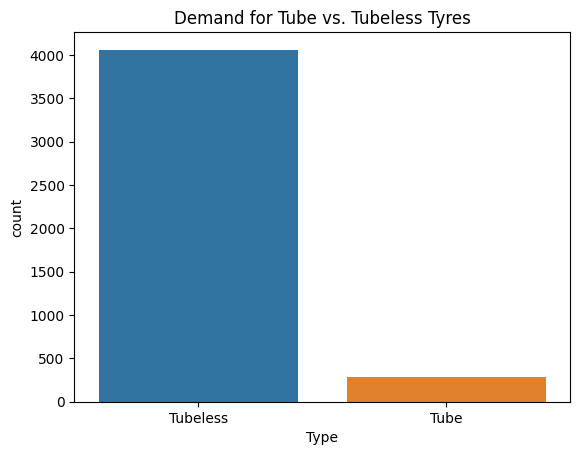

In [22]:
# Visualize demand for tube vs. tubeless tyres
sns.countplot(x = 'Type', data=df)
plt.title('Demand for Tube vs. Tubeless Tyres')
plt.show()

**Task 2 Result :**
- Tubeless Tyres : 4061 entries (93.36%)
- Tube Tyres : 289 entries (6.64%)
- Total Data Points : 4350
- Bar chart clearly shows the higher demand for tubless tyres compared to tube tyres.


**Observations-**
Tubeless tyres dominate the market, accounting for more than 93% of the total demand. 

### Task 3 :
- Identify the major players in the market.

**Approach :**
In our dataset we don't have sell quantities so by counting number of entries, we will check which Tyre Brand has highest number of entries present in dataset and  brands having highest entries will be assumed major players in market.

In [23]:
# Counting values of 'Tyre Brand' column
df['Tyre Brand'].value_counts().reset_index()

,Tyre Brand,count
0,BridgeStone,610
1,GoodYear,501
2,CEAT,449
3,JKTyre,445
4,Apollo,400
5,Yokohama,379
6,Continental,339
7,Falken,269
8,MRF,263
9,Firestone,171


**Task 3 Result :**
We have list of all the Tyre Brands having total number of Tyre Models in dataset in descending order, in which Bridgestone, GoodYear, CEAT, JKTyre and Apollo are top five Brands in the market.

**Observations -** 
**Bridgestone**, **GoodYear**, **CEAT**, **JKTyre** and **Apollo** are top five players in the market for Maruti Brand.

### Task 4 :
- Find the top 5 brands with the most tyre models.

**Approach :**
Grouping tyre brands with their unique tyre models and sorting them will get top 5 brands.

In [24]:
# Grouping unique tyre models with tyre brands
df.groupby('Tyre Brand')['Tyre Model'].nunique().sort_values(ascending = False).reset_index()

,Tyre Brand,Tyre Model
0,GoodYear,17
1,Apollo,14
2,BridgeStone,11
3,JKTyre,11
4,Yokohama,11
5,MRF,9
6,CEAT,7
7,Continental,7
8,Falken,6
9,Pirelli,5


**Task 4 Result :**
All tyre brands having total number of tyre models present in dataset listed above.


**Observations-**
Here are top five tyre brands with most tyre models :
- **GoodYear** with 17 type of tyre models. 
- **Apollo** with 14 type of tyre models.
- **Bridgestone**, **JKTyre**, and **Yokohama** all three tyre brands with 11 type of tyre models each.

### Task 5 :
- Determine which Maruti model has the highest number of tyre models and from which tyre brand.

**Approach :**
Grouping Maruti models with tyre brands and count on tyre models in descending order will provide the required result. 

In [25]:
# Group by Model with tyre brand and apply count on tyre model column then sorting it
df.groupby(['Model','Tyre Brand'])['Tyre Model'].count().sort_values(ascending=False).reset_index()

,Model,Tyre Brand,Tyre Model
0,Ciaz,BridgeStone,102
1,Ciaz,Yokohama,88
2,Alto,JKTyre,75
3,Ciaz,CEAT,69
4,Ertiga,BridgeStone,56
...,...,...,...
311,Zen,GoodYear,1
312,Zen,Firestone,1
313,Zen,Continental,1
314,Zen,CEAT,1


**Task 5 Result :**
We have listed all the Maruti models with their number of tyre models present in dataset along with tyre brands.

**Observations -**
- Maruti model *Ciaz* having 102 number of tyre models of Bridgestone brand.

### Task 6 :
- Investigate whether expensive tyres have higher ratings

**Approach :**
- Using .corr() method to calculate the correlation coefficient between the two columns.
- Visualising the relationship using a scatter plot for better insight. 

In [26]:
# Check correlation by using .corr()
df[['Selling Price','Rating']].corr()

,Selling Price,Rating
Selling Price,1.000000,-0.055177
Rating,-0.055177,1.000000


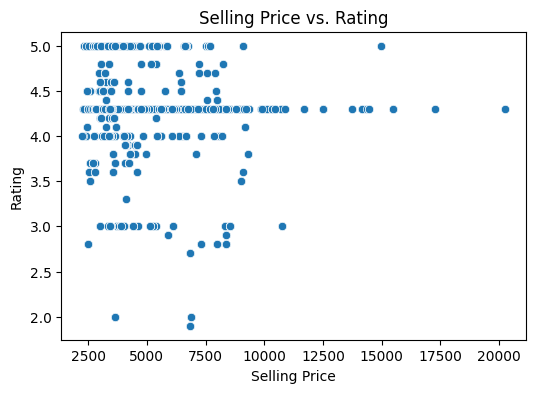

In [27]:
# Visualising the correlation using scatter plot
plt.figure(figsize = (6,4))
sns.scatterplot(x='Selling Price', y='Rating', data=df)
plt.title('Selling Price vs. Rating')
plt.show()

**Task 6 Result :**
- Correlation coefficient : '-0.055'.
- The scatter plot shows a wide spread of points, confirming lack of strong relationship between Selling Price and Rating.


**Observations -**
- A very week **Negative correlation** exists between 'Selling Price' and 'Rating',
- This indicates that higher priced tyres **do not necessarily** have higher ratings. In fact, as the price increases ratings tend to decrease slightly, though the relationship is too weak to draw conclusions.

### Task 7 :
- Identify which tyre model has the highest ratings.

**Approach :**
- Found maximum rating is 5 in the 'Rating' column.
- Filtering dataset to include tyre models with rating of 5.
- Displaying the tyre brand, tyre model and rating.

In [34]:
# Selecting tyres with rating 5 by grouping tyre brands and tyre models picking first entry for each group
df[df['Rating'] == 5].groupby(['Tyre Brand','Tyre Model']).first().reset_index()[['Tyre Brand','Tyre Model','Rating']]

,Tyre Brand,Tyre Model,Rating
0,Apollo,AMAZER3G,5.0
1,Apollo,Ainac 4G,5.0
2,Apollo,Ainac 4GS,5.0
3,Apollo,Amazer 4G Life,5.0
4,Apollo,Amazer XL,5.0
5,Apollo,Apterra Cross,5.0
6,BridgeStone,B-Series B290,5.0
7,BridgeStone,Ecopia EP150,5.0
8,BridgeStone,L607,5.0
9,BridgeStone,S-Series S248,5.0


**Task 7 Result :**
Above list having 39 tyre models with rating of 5.


**Observations -**
There are 39 tyre models having rating of 5 across all brands. 

### Task 8 :
- Calculate the average selling price by tyre brand.

**Approach :**
- Grouping the dataset by tyre brand.
- Calculating the mean of 'Selling price' column for each tyre brand.
- Rounding up the mean values of 'Selling Price' column for clarity.
- Reseting the index to create proper structure of result.
- Renaming the column to 'Average Selling Price' for clarity.
- Sorting 'Average Selling Price' column to get highest and lowest average selling brand.

In [67]:
# Grouping Tyre brands and calculating mean of selling price also rounding up the values
avg_sell_price = df.groupby('Tyre Brand')['Selling Price'].mean().apply(lambda x : round(x)).astype(int).reset_index()

In [68]:
# Renaming the column and sorting them in descending order
avg_sell_price.rename(columns = {'Selling Price' : 'Average Selling Price'}, inplace = True)

In [69]:
avg_sell_price.sort_values(by = 'Average Selling Price', ascending = False).reset_index(drop=True)

,Tyre Brand,Average Selling Price
0,Pirelli,7358
1,Michelin,6893
2,Maxxis,6232
3,Yokohama,6119
4,Continental,5250
5,BridgeStone,5190
6,Falken,5066
7,Hankook,4980
8,Kumho,4650
9,Apollo,4630


**Task 8 Result :**
Above shown is list of average selling price of all 16 tyre brands.


**Observations -**
- **Pirelli and Michelin** have the **highest average selling price**, indicating they are likely to be premium brands with higher quality or performance focused.
- **JKTyre and Firestone** offers the most **budget friendly** options, suggests they may cater to cost-conscious customers.
- The price variation between brands is quite significant, showing a wide range of product offerings for different market segments.

### Task 9 :
- Find which tyre size has the highest number of car models.

**Approach :**
- Grouping by tyre size and counting unique car models.
- Reseting the index to create proper structure of result.
- Sorting results in descending order to identify tyre size with highest number of unique car models.

In [77]:
#Grouping size with model column and applying unique and sorting function 
tyre_size_count = df.groupby('Size')['Model'].nunique().sort_values(ascending = False).reset_index()

In [78]:
#Getting top result
tyre_size_count.head(1)

,Size,Model
0,165/80 R 14,9


**Task 9 Result :**
Size - 165/80 R 14 has highest number of 9 unique car models.


**Observations _**
- The tyre size **"165/80 R 14"** is the most popular size, fitting the highest number of unique car models (9).
- This suggests that this size is likely a standard or widely compatible size across various car models in our dataset.
- Such insights can help in inventory planning and demand forecasting for tyre manufacturers and sellers.

### Task 10 :
- Identify the car model and sub-model with the maximum and minimum load index.

**Approach :**
- Grouping by car model and submodel with load index.
- Using .max() and .min() function to identify car models and sub models with maximum and minimum load index respectively.
- Sorting result in descending order to obtain both maximum and minimum load index for car models and submodels.
- Select relevant columns to display car models and submodels.

In [83]:
# Group by model, submodel and load index using .max() function
df.groupby(['Model','Submodel'])['Load Index'].max().sort_values(ascending = False).reset_index()

,Model,Submodel,Load Index
0,Grand Vitara,Diesel,106
1,Grand Vitara,2.4 MT (Petrol),106
2,Grand Vitara,2.4 AT (Petrol),106
3,Grand Vitara 2003-2007 XI,7 Mt,102
4,Grand Vitara,2.4 AT,101
...,...,...,...
238,Zen,Petrol,71
239,Zen,Petrol,71
240,Zen,Petrol,71
241,Alto K10,LXi [2010 - 2014],71


In [82]:
# Group by model, submodel and load index using .max() function
df.groupby(['Model','Submodel'])['Load Index'].min().sort_values(ascending = False).reset_index()

,Model,Submodel,Load Index
0,Grand Vitara,2.4 AT (Petrol),102
1,Grand Vitara 2003-2007 XI,7 Mt,102
2,Grand Vitara,Diesel,102
3,Grand Vitara,2.4 MT (Petrol),102
4,Grand Vitara,2.4 MT,101
...,...,...,...
238,Omni,E MPI STD,69
239,Omni,LPG CARGO BSIII W IMMOBILISER,69
240,Omni,LPG STD BSIII 5 STR W IMMOBILISER,69
241,Omni,MPI Ambulance,69


**Task 10 Result :**
- **Maximum Load Index is 106.**
- Car model with Maximum Load Index is **Grand Vitara.** 
- **Minimum Load Index is 69.**
- Car models with Minimum Load Index : **Omni, Zen Estilo and more**
- All the submodels are also available in both dataframes shown above.



**Observations -**
- **Grand Vitara** dominates the highest load index, which aligns with it's identity as a larger SUV, requiring tyres designed for heavier loads. 
- It's interesting that maximum load index is 106, which is relatively moderate for larger vehicles.
- Multiple models of **Maruti Omni and Zen Estilo** have the lowest load index of 69, indicating these vehicles likely require light load tyres.
- These models are mainly small, lightweight cars and utility vehicles. It makes sense they don't require heavy duty tyres.




### Task 11 :
- Find the total number of unique car models in the dataset.

**Approach :**
- Using Model column to find unique car models.
- Applying .nunique() on the 'Model' column to get the total number of unique models.

In [84]:
# Apply .nunique function
df['Model'].nunique()

34

**Task 11 Result :**
- **Total unique car models : 34**

**Observations -**
- The dataset captures a wide variety of models, giving us diverse insights into tyre compatibility.
- A higher number of unique models indicates the dataset's richness and can help analyze tyre preferences across different car types.

### Task 12 :
- List the total number of unique car models.

**Approach :**
- Grouping 'Model' column.
- Using nunique() to list all unique models.
- Reseting the index for counting total number of models for clarity.


In [94]:
# Grouping 'Model' column abd using nunique function
df.groupby('Model').nunique().reset_index()[['Model']]

,Model
0,800
1,A-Star
2,Alto
3,Alto K10
4,Baleno
5,Celerio
6,Celerio X
7,Ciaz
8,Dzire
9,Eeco


**Task 12 Result :**
Above shown the list of total unique car models in dataset.


**Observations -**
- This list helps identify the car models covered in the dataset and gives a quick overview of the variety.
- We can further group or analyze tyre demand by these models to spot trends.

### Task 13 :
- List the total number of tyre brands in the dataset and how many there are.

**Approach :**
- Grouping 'Tyre Brand' column.
- Using .nunique() to find all unique tyre brands in dataset.
- Reseting index to count number of unique tyre brands.

In [96]:
# Group by Tyre brand column and using nunique function
df.groupby('Tyre Brand').nunique().reset_index()[['Tyre Brand']]

,Tyre Brand
0,Apollo
1,BridgeStone
2,CEAT
3,Continental
4,Falken
5,Firestone
6,GoodYear
7,Hankook
8,JKTyre
9,Kumho


**Task 13 Result :**
- **Total Number of Tyre Brands : 16**
- Above shown is list of all tyre brands in dataset.


**Observations -**
- The dataset covers a good variety of tyre brands both domestic and international.
- This diversity gives us scope to analyze brand preferences, pricing strategies and market competition.

### Task 14 :
- List the total number of tyre models in the dataset and how many there are.

**Approach :**
- Combine Tyre Brand and Tyre Model for more clarity.
- Using .nunique() to get unique tyre models.
- Reseting them to get total number of unique tyre models.

In [101]:
df.groupby(['Tyre Brand','Tyre Model']).nunique().reset_index()[['Tyre Model','Tyre Brand']]

,Tyre Model,Tyre Brand
0,AMAZER3G,Apollo
1,Ainac 4G,Apollo
2,Ainac 4GS,Apollo
3,Altrust,Apollo
4,Amazer 3G Maxx,Apollo
...,...,...
109,Geolandar A/T G015,Yokohama
110,Geolandar A/T G016,Yokohama
111,Geolandar G92C,Yokohama
112,Geolandar SUV G055,Yokohama


**Task 14 Result :**
- **Total Number of Tyre Models : 114**
- Above shown is list of all tyre models along with tyre brands.


**Observations -**
- Combining brand and model gives a much clearer picture of the product lineup and avoids confusion between models from different brands.

### Task 15 :
- Find the total number of tyre models for each tyre brand.

**Approach :**
- Grouping tyre brand column.
- Using .nunique() on tyre model column.
- Sorting result in descending order to identify highest and lowest number of tyre models each tyre brand has.
- Reseting for clearer result.
- Renaming column Tyre Model to Number of Tyre Model for better clarity.

In [106]:
# Grouping tyre brand and using nunique() function on tyre model then sorting values
total_tyre_model = df.groupby('Tyre Brand')['Tyre Model'].nunique().sort_values(ascending = False).reset_index()

In [108]:
# Renaming the column
total_tyre_model.rename(columns = {'Tyre Model' : 'Number of Tyre Model'}, inplace = True)

In [109]:
# Checking the Result
total_tyre_model

,Tyre Brand,Number of Tyre Model
0,GoodYear,17
1,Apollo,14
2,BridgeStone,11
3,JKTyre,11
4,Yokohama,11
5,MRF,9
6,CEAT,7
7,Continental,7
8,Falken,6
9,Pirelli,5


**Task 15 Result :**
- Above shown list has number of tyre models each brands have.


**Observations -**
- **GoodYear** offers the highest variety with 17 different models, suggesting they cater to a wide range of vehicle types and needs.
- Brands like **Kumho, UltraMile and Firestone** have fewer models, possibly focusing on niche or specialized tyres.

### Task 16 :
- List tyre brands along with their models having a price below ₹5000.

**Approach :**
- Grouping tyre brand , tyre model and size column from which selling price of each size calculated.
- Including size column because prices are dependent on size not just model.
- Selecting rows having selling price below 5000.
- Reseting index for clarity.
- Sorting prices in descending order for better differentiating.


In [116]:
# Grouping tyre brand, tyre model, size with mean of selling price then sorting them
tyre_sell_price = df.groupby(['Tyre Brand','Tyre Model','Size'])['Selling Price'].mean().sort_values(ascending = False).reset_index()

In [120]:
# Selecting tyres with prices below 5000
sellprice_below_5000 = tyre_sell_price[tyre_sell_price['Selling Price'] <= 5000 ].reset_index(drop=True)

In [121]:
# Checking the result
sellprice_below_5000

,Tyre Brand,Tyre Model,Size,Selling Price
0,BridgeStone,Ecopia EP150,185/70 R 14,5000.0
1,Hankook,Optimo ME02,185/70 R 14,4987.0
2,Continental,Comfort Contact CC6,175/70 R 13,4973.0
3,BridgeStone,Ecopia EP150,185/65 R 14,4950.0
4,CEAT,Milage X3,185/65 R 15,4894.0
...,...,...,...,...
220,Firestone,FR500,145/80 R 12,2328.0
221,GoodYear,Ducaro Hi-Miler,145/70 R 17,2324.0
222,Firestone,FR500,145/70 R 16,2280.0
223,CEAT,Milage X3,145/70 R 12,2262.0


**Task 16 Result :**
- Above shown list having all tyre brands, tyre models with their sizes having prices below 5000.


**Observations -**
- Tyre size significantly affects the price , even within the same model and brand.
- Smaller sizes are more affordable and larger sizes tend to be pricer.

### Task 17 :
- List tyre brands along with their models having a price above ₹5000.

**Approach :**
- Using above dataframe tyre_sell_price for evaluating result.
- Selecting rows having selling price above 5000.
- Reseting index for clarity.

In [122]:
# Selecting tyres with prices above 5000
sellprice_above_5000 = tyre_sell_price[tyre_sell_price['Selling Price'] > 5000].reset_index(drop=True)

In [123]:
# Checking the result
sellprice_above_5000

,Tyre Brand,Tyre Model,Size,Selling Price
0,Yokohama,DB E70B,215/55 R 17,20257.0
1,Yokohama,BluEarth AE50,215/55 R 17,17284.0
2,Michelin,Primacy SUV,225/65 R 17,14963.0
3,Pirelli,Scorpion Verde All Season,225/65 R 17,14827.0
4,Michelin,Latitude Tour,225/65 R 17,14358.0
...,...,...,...,...
150,BridgeStone,B-Series B290,185/70 R 14,5150.0
151,BridgeStone,B-Series B290,185/65 R 14,5140.0
152,CEAT,SecuraDrive,195/65 R 15,5126.0
153,UltraMile,UM 551,195/65 R 15,5099.0


**Task 17 Result :**
- Above shown list having all tyre brands, tyre models with their sizes having prices above 5000.


**Observations -**
- Premium brands dominate the higher price range, with brands like **Yokohama, Michelin, and Pirelli** offering the costliest models.
- Larger tyre sizes (17” and above) generally correlate with higher prices.

### Task 18 :
- List each unique car model and sub-model along with other attributes like tyre brand, tyre model, load index, size, original price, and rating. Also, find the total number of unique models and sub-models in the dataset.

**Approach :**
- Grouping dataset by unique Models and Submodels then extracting all other attributes.
- Reseting Index for clarity.
- Using .nunique() to identify total number unique Models and Submodels in dataset.

In [144]:
# Grouping Model and submodel using nunique() function then adding other attributes to reseted dataframe
df.groupby(['Model','Submodel']).nunique().reset_index()[['Model','Submodel','Tyre Brand','Tyre Model','Size','Type','Load Index','Selling Price','Original Price','Rating']]

,Model,Submodel,Tyre Brand,Tyre Model,Size,Type,Load Index,Selling Price,Original Price,Rating
0,800,Petrol,8,9,9,2,2,9,9,3
1,A-Star,AT VXI,12,19,1,2,1,20,20,5
2,A-Star,Lxi,12,19,1,2,1,20,20,5
3,A-Star,Vxi,12,19,1,2,1,20,20,5
4,A-Star,Zxi,12,19,1,2,1,20,20,5
...,...,...,...,...,...,...,...,...,...,...
238,Zen Estilo,LXI Green (CNG),9,15,1,2,2,19,19,4
239,Zen Estilo,LXI(Petrol),9,15,1,2,2,19,19,4
240,Zen Estilo,Petrol,9,15,1,2,2,19,19,4
241,Zen Estilo,VXI W/ ABS(Petrol),9,15,1,2,2,19,19,4


In [138]:
# Total number of unique submodels in dataset
df['Submodel'].nunique()

178

In [142]:
# Total number of unique models in dataset
df['Model'].nunique()

34

**Task 18 Result :**
- Above shown list of unique Models and Submodels along with other attributes.
- **Total Number of Unique Models : 34.**
- **Total Number of Unique Submodels : 178.**


**Observations -**
- The dataset captures a wide variety of car models and their sub-models.
- The variation in tyre brands, tyre models, and sizes shows a diverse market offering.
- Prices and ratings differ significantly even for similar models, indicating market competition and product differentiation.

### Summary of Findings :

- **Most Popular Tyre Type** - Tubeless(4061 out of 4350).
- **Most Expensive Tyre Brand** - Pirelli(₹7358 avg).
- **Most Affordable Tyre Brands** - JKTyre(₹3601) and Firestone(₹3483)
- **Correlation between price and rating** - Slightly negative(-0.055).
- **Grand Vitara has the Highest Load Index** - 106.
- **Maruti Omni ans Zen Estilo have Lowest Load Index** - 69.


### Conclusions :
This EDA provided crucial insights into the tyre market, pricing, and demand trends. The findings can help manufacturers and customers make better decisions.